In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline 
plt.style.use("seaborn")

In [7]:
df = pd.read_excel("../combine_data.xlsx", sheet_name=0, index_col=0, parse_dates=True)
df

,spot,future,dollar index,S&P index,exchange rate,federal fund rate,oil price
Date,,,,,,,
2001-01-18,265.05,264.8,109.890,1348.00,8.2764,5.93,30.45
2001-01-19,264.85,264.9,110.650,1342.50,8.2764,5.92,32.19
2001-01-22,266.95,267.0,110.210,1342.90,8.2782,6.00,32.19
2001-01-23,266.55,266.7,110.280,1360.40,8.2786,5.97,29.57
2001-01-24,264.95,264.6,111.720,1364.30,8.2786,6.05,29.05
...,...,...,...,...,...,...,...
2022-12-23,1797.91,1804.2,104.010,3844.82,6.9880,4.33,79.34
2022-12-27,1813.93,1823.1,103.893,3829.25,6.9600,4.33,79.77
2022-12-28,1804.09,1815.8,104.182,3783.22,6.9774,4.33,78.60


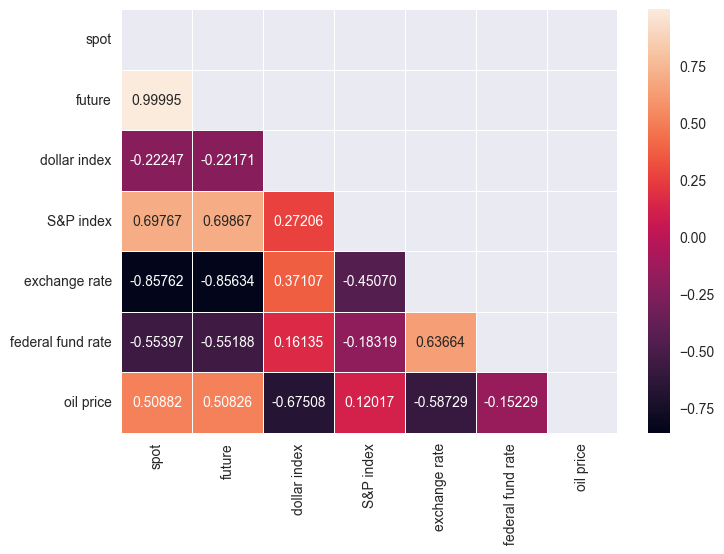

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.5f', linecolor='white', linewidths=.5, mask=np.triu(corr));

In [18]:
X = df.iloc[:, 1:]
X = add_constant(X)
vif = pd.DataFrame(columns=['Variables', "VIF"])
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns
vif['VIF'] = vifs
vif

,Variables,VIF
0,const,873.093055
1,future,8.067474
2,dollar index,2.615589
3,S&P index,3.740389
4,exchange rate,5.594568
5,federal fund rate,2.210457
6,oil price,2.909404


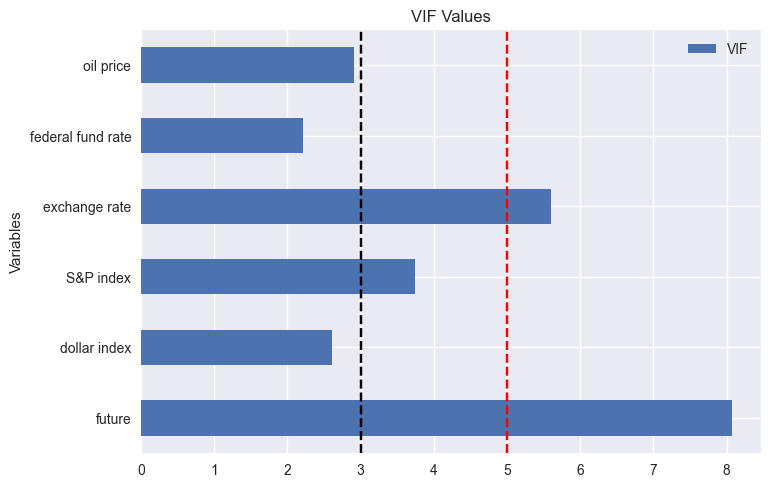

In [25]:
vif.set_index("Variables").iloc[1:, :].plot.barh(title='VIF Values')
plt.axvline(5, color='red', linestyle='--')
plt.axvline(3, color='black', linestyle='--');